# K-Means Clustering

## Libraries Loading

In [1]:
library(tidyverse)
library(ggplot2)
library(cluster)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data loading

In [2]:
data <- read_csv('../00_data/Mall_Customers.csv')
head(data)

Rows: 200 Columns: 5
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): CustomerID, Genre
dbl (3): Age, Annual Income (k$), Spending Score (1-100)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
<chr>,<chr>,<dbl>,<dbl>,<dbl>
0001,Male,19,15,39
0002,Male,21,15,81
0003,Female,20,16,6
0004,Female,23,16,77
0005,Female,31,17,40
0006,Female,22,17,76


In [3]:
# data structure
glimpse(data)

Rows: 200
Columns: 5
$ CustomerID               <chr> "0001", "0002", "0003", "0004", "0005", "0006…
$ Genre                    <chr> "Male", "Male", "Female", "Female", "Female",…
$ Age                      <dbl> 19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 3…
$ `Annual Income (k$)`     <dbl> 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 1…
$ `Spending Score (1-100)` <dbl> 39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, …


## Features

In [4]:
set.seed(123)

X <- data |> select(`Annual Income (k$)`, `Spending Score (1-100)`)
head(X)

Annual Income (k$),Spending Score (1-100)
<dbl>,<dbl>
15,39
15,81
16,6
16,77
17,40
17,76


## Feature scaling

In [5]:
X_scaled <- scale(X)
head(X_scaled)

Annual Income (k$),Spending Score (1-100)
-1.734646,-0.4337131
-1.734646,1.1927111
-1.696572,-1.7116178
-1.696572,1.0378135
-1.658498,-0.3949887
-1.658498,0.9990891


## Find the optimal number of clusters

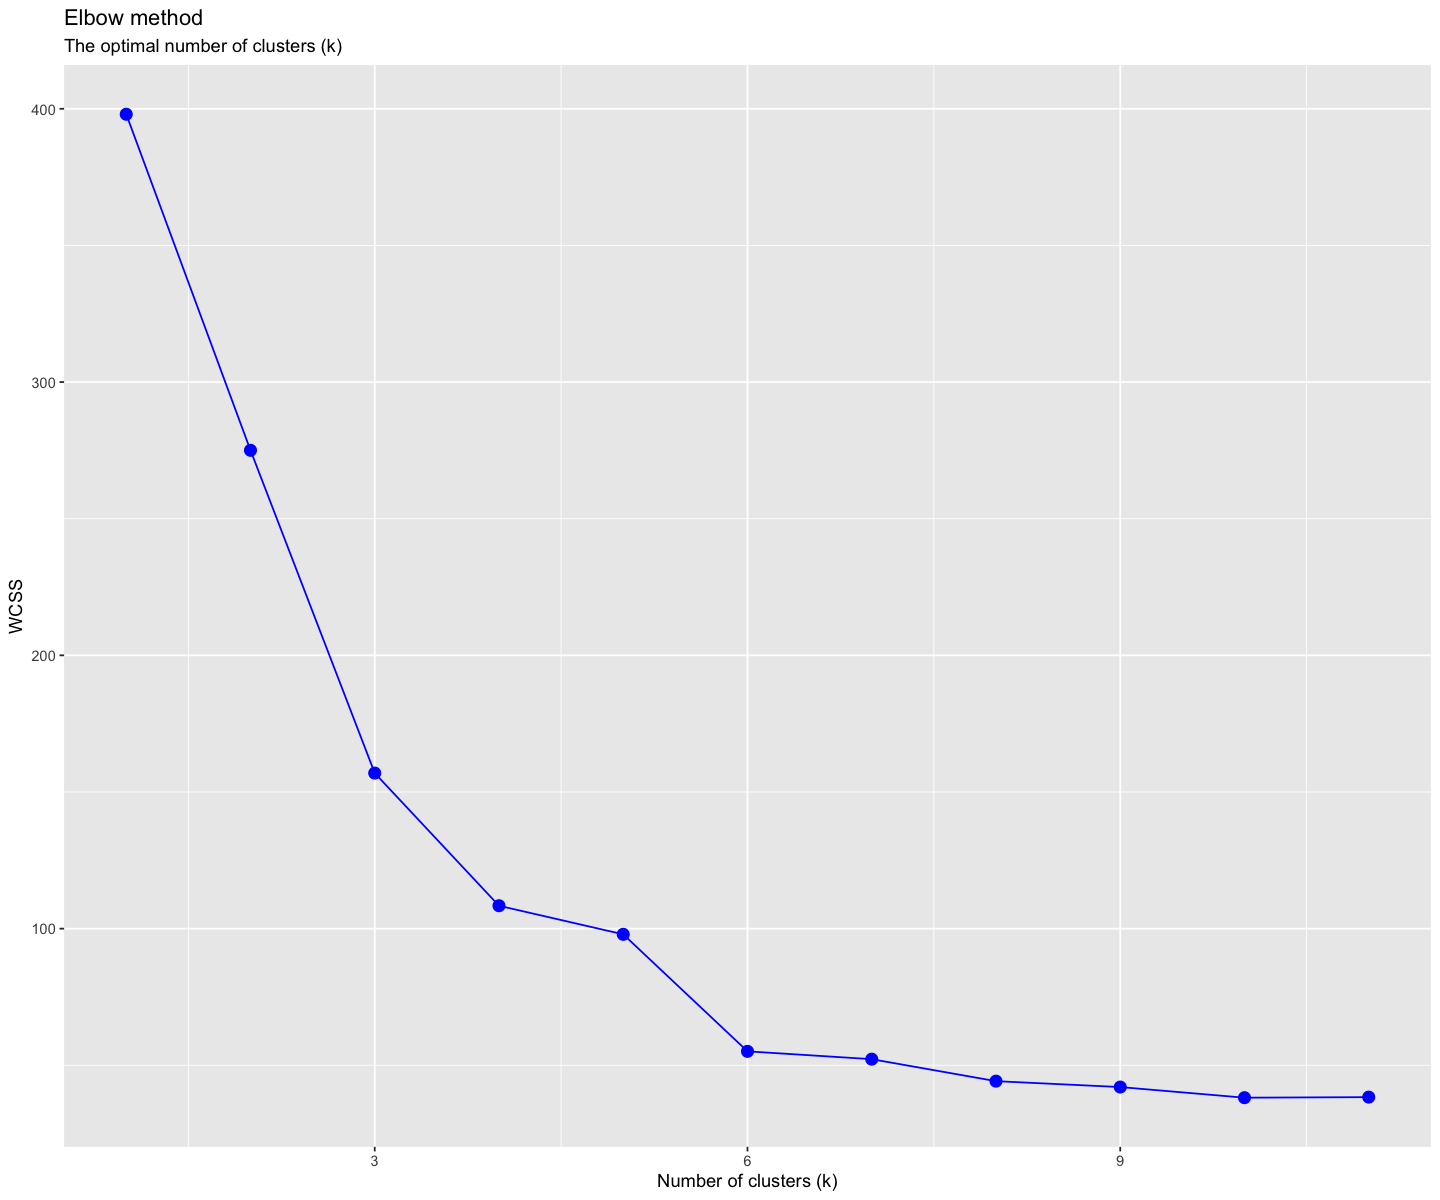

In [6]:
set.seed(6)
wcss <- vector()
for(i in 1:11){
    fit <- kmeans(X_scaled, centers = i)
    wcss[i] <- sum(fit$withinss)
}
# plot the elbow
options(repr.plot.width=12, repr.plot.height=10)
tibble(k = 1:11, wcss = wcss) |>
ggplot(aes(x = k, y = wcss)) +
    geom_point(color = 'blue', size = 3) +
    geom_line(color = 'blue') +
    labs(title = 'Elbow method', subtitle = 'The optimal number of clusters (k)',
        x = 'Number of clusters (k)', y = 'WCSS')


## Fit the model with optimal $k=5$

In [7]:
set.seed(123)
fit <- kmeans(X_scaled, centers = 5, iter.max = 300, nstart = 10)

fit$cluster

[1] 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 [38] 3 2 3 2 3 2 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 5 4 5 1 5 4 5 4 5 1 5 4 5 4 5 4 5 4 5 1 5 4 5 4 5
[149] 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4
[186] 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5

In [8]:
fit$centers

,Annual Income (k$),Spending Score (1-100)
1,-0.2004097,-0.02638995
2,-1.3042458,-1.13411939
3,-1.3262173,1.12934389
4,1.0523622,-1.28122394
5,0.9891010,1.23640011


## Viz the clusters

In [9]:
# inverse scaled data
inverse_scale <- function(scaled_data, mean, sd) {
  scaled_data * sd + mean
}

mean_data <- attr(X_scaled, "scaled:center")
sd_data <- attr(X_scaled, "scaled:scale")

original_centroids <- inverse_scale(fit$centers, mean_data, sd_data)
original_centroids

,Annual Income (k$),Spending Score (1-100)
1,55.29630,49.51852
2,16.51978,30.77267
3,25.72727,79.36364
4,77.37570,26.90901
5,86.53846,82.12821


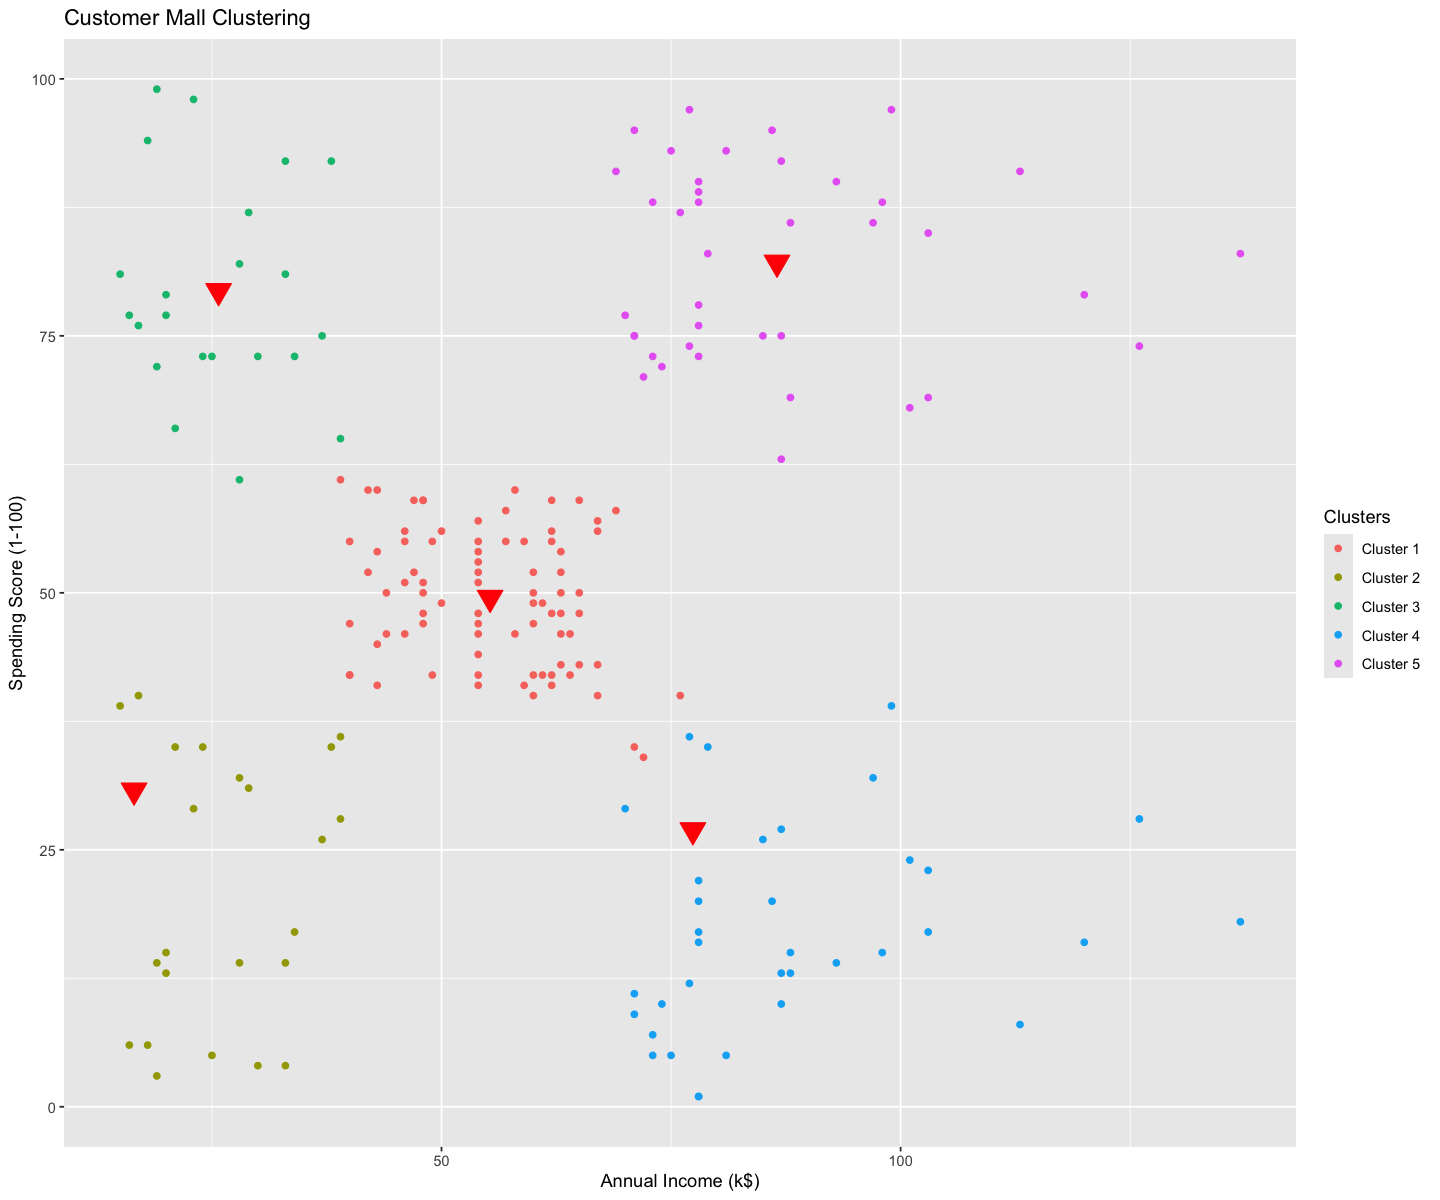

In [10]:
df <- X
df$Cluster <- fit$cluster

options(repr.plot.width=12, repr.plot.height=10)

df |>
ggplot() +
    geom_point(aes(x = `Annual Income (k$)`,
                   y = `Spending Score (1-100)`, 
                   colour = paste0('Cluster ', factor(Cluster)))) +
    geom_point(data = original_centroids, 
               aes(x = `Annual Income (k$)`,
                   y = `Spending Score (1-100)`),
               color = 'red',
               fill = 'red',
               shape = 25,
               size = 5) +
    labs(title = 'Customer Mall Clustering', x = 'Annual Income (k$)',
         y = 'Spending Score (1-100)', color = 'Clusters')

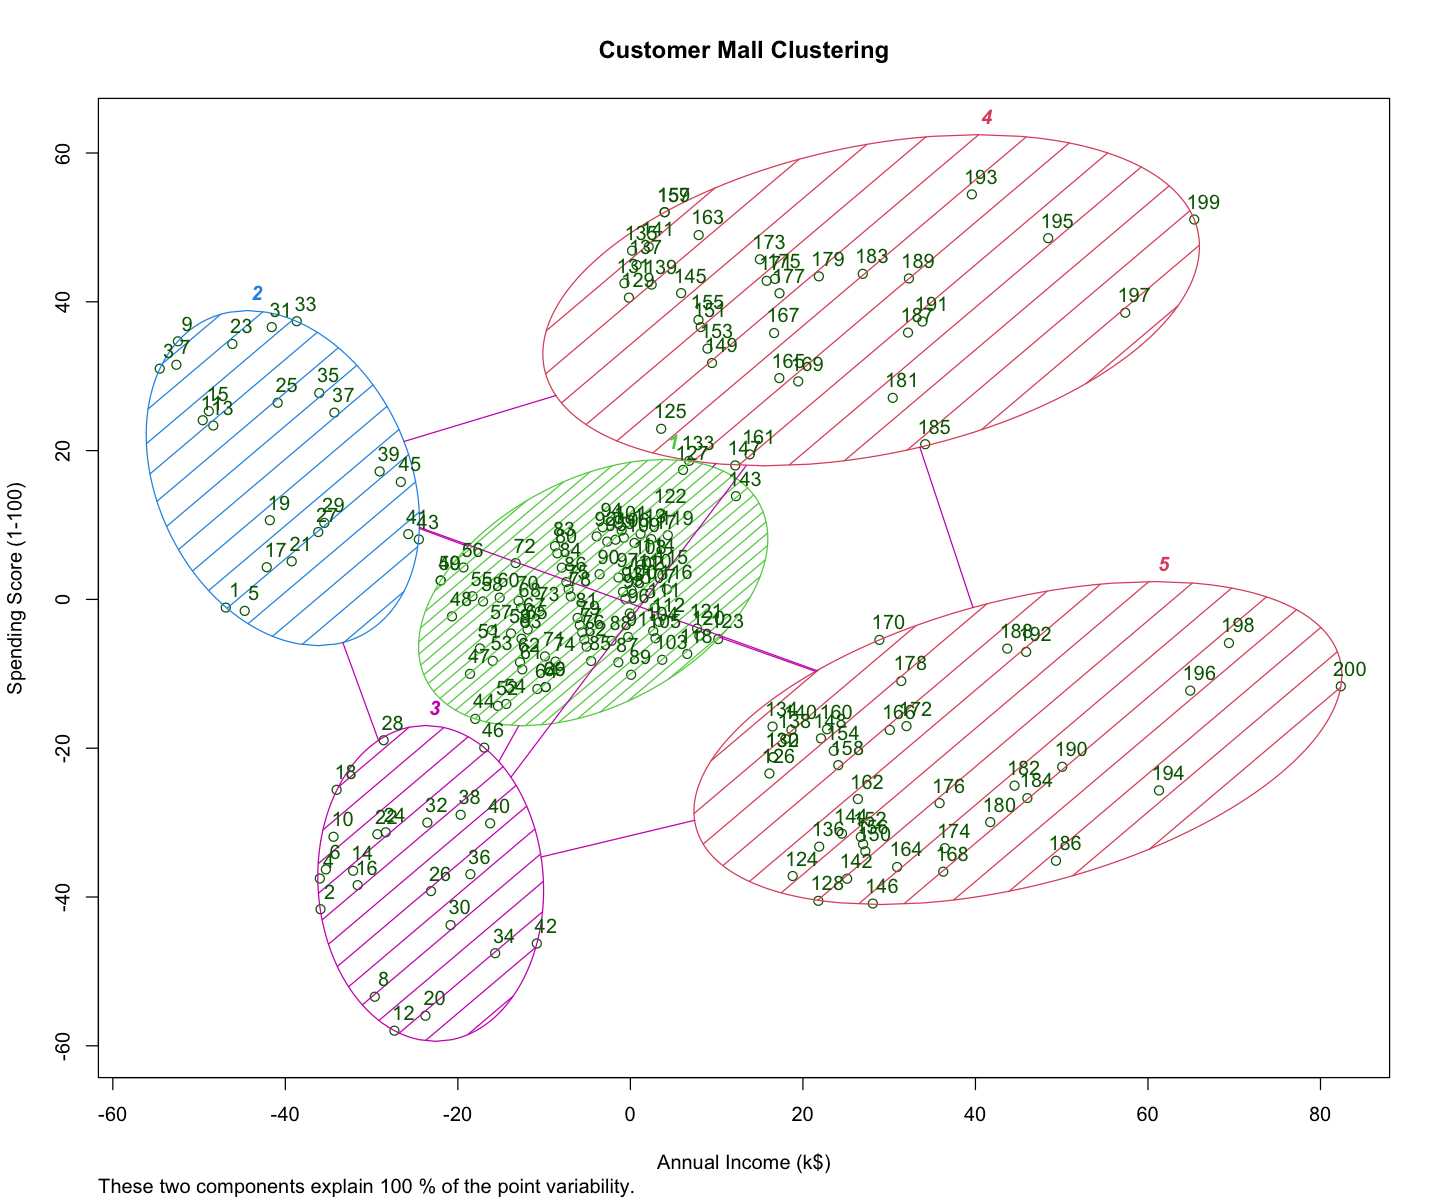

In [11]:
options(repr.plot.width=12, repr.plot.height=10)
clusplot(X,
        fit$cluster,
        shade = TRUE,
        color = TRUE,
        labels = 2,
        plotchar = FALSE,
        span = TRUE,
        main = paste('Customer Mall Clustering'),
        xlab = 'Annual Income (k$)',
        ylab = 'Spending Score (1-100)')